# Multi-armed bandit problem

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import seaborn as sns
import matplotlib.pyplot as plt
from multi_armed_bandit import (
    TestBed, GreedyAgent, EpsilonGreedyAgent, UCBAgent, Simulation)

num_simulations = 2000
num_steps = 1000

In [2]:
simulation_greedy = Simulation(
    env_type=TestBed,
    agent_type=GreedyAgent,
    num_agents=num_simulations,
    init_value=None,
    step=num_steps,
    env_kwargs={'num_arms': 10},
)

simulation_greedy.run_all_agents()
steps_greedy, avg_rewards_greedy = simulation_greedy.aggregate_rewards(make_plot=False)

Simulation running: 100%|██████████| 2000/2000 [01:29<00:00, 22.29it/s]


In [3]:
simulation_eps_greedy = Simulation(
    env_type=TestBed,
    agent_type=EpsilonGreedyAgent,
    num_agents=num_simulations,
    init_value=None,
    step=num_steps,
    env_kwargs={'num_arms': 10},
    agent_kwargs={'epsilon': 0.1},
)

simulation_eps_greedy.run_all_agents()
steps_eps_greedy, avg_rewards_eps_greedy = \
    simulation_eps_greedy.aggregate_rewards(make_plot=False)

Simulation running: 100%|██████████| 2000/2000 [01:54<00:00, 17.50it/s]


In [4]:
simulation_ucb = Simulation(
    env_type=TestBed,
    agent_type=UCBAgent,
    num_agents=num_simulations,
    init_value=None,
    step=num_steps,
    env_kwargs={'num_arms': 10},
    agent_kwargs={'c': 2.},
)

simulation_ucb.run_all_agents()
steps_ucb, avg_rewards_ucb = simulation_ucb.aggregate_rewards(make_plot=False)

Simulation running: 100%|██████████| 2000/2000 [03:53<00:00,  8.57it/s]


<IPython.core.display.Javascript object>


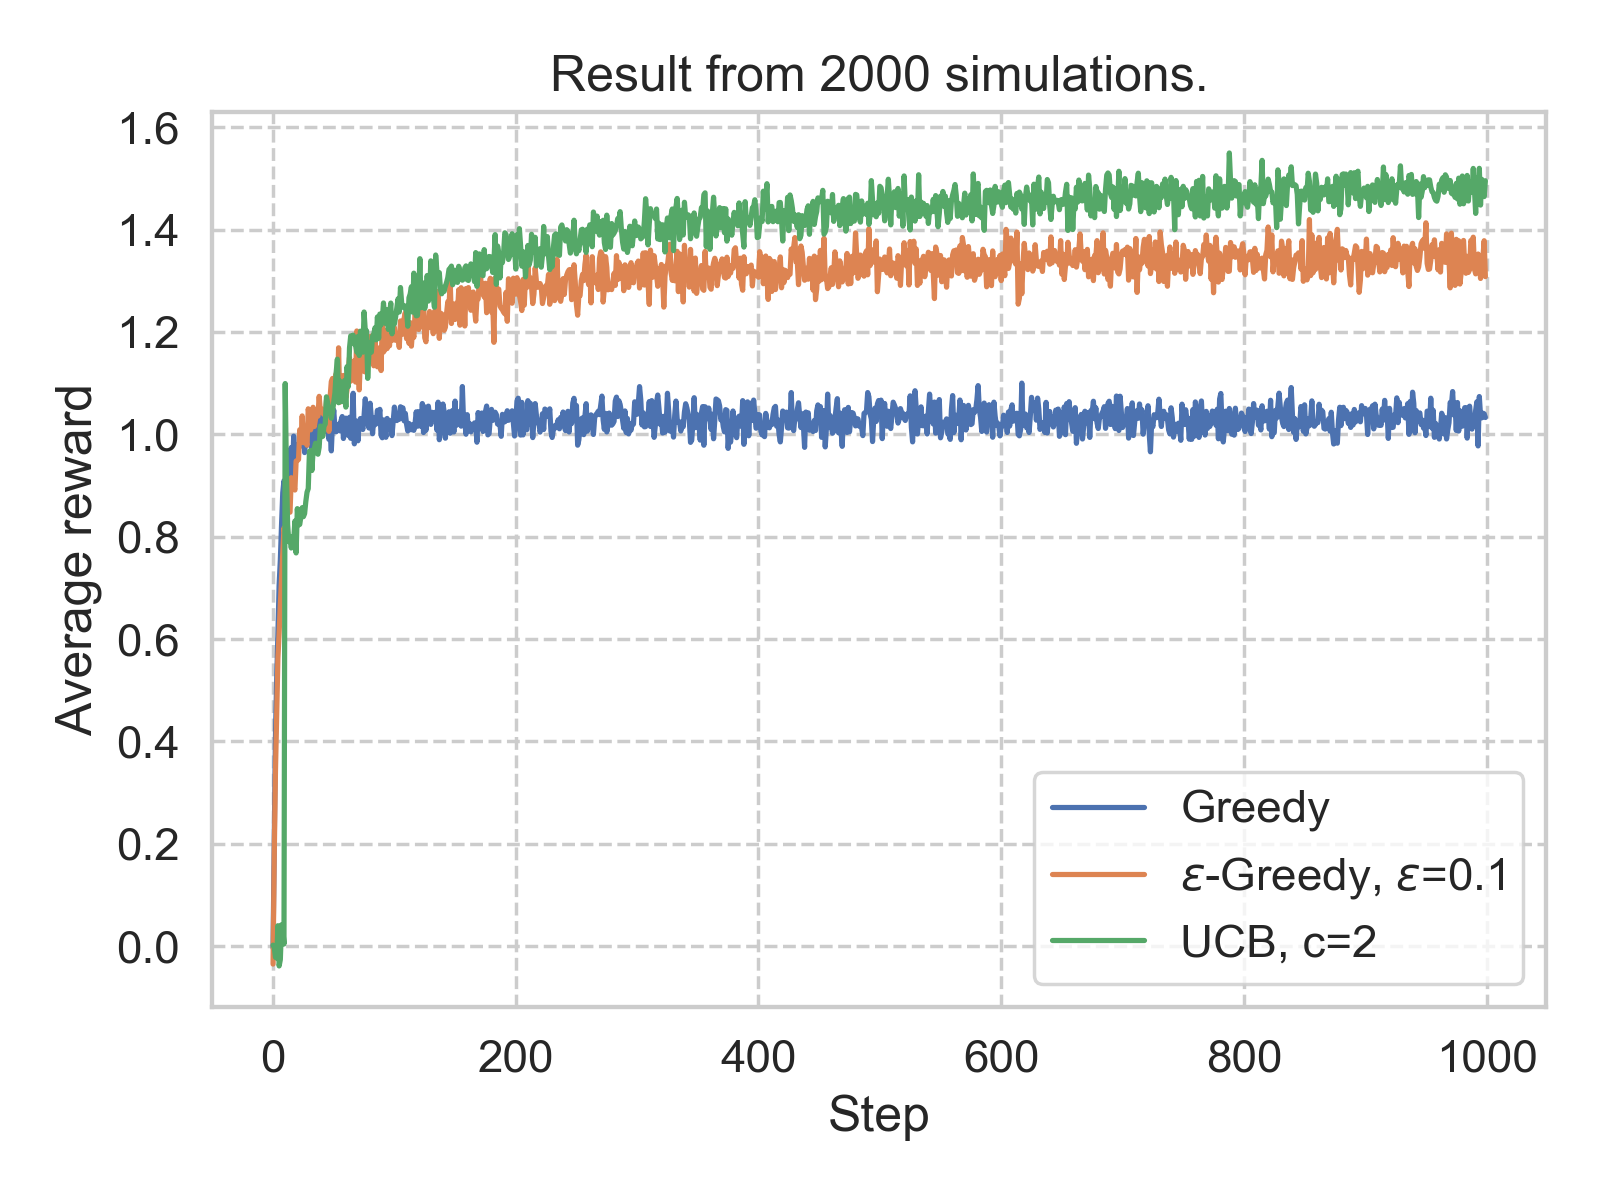

In [5]:
# make plots
sns.set(font_scale=1.2)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.lineplot(
    x=steps_greedy,
    y=avg_rewards_greedy,
    label='Greedy',
)
sns.lineplot(
    x=steps_eps_greedy,
    y=avg_rewards_eps_greedy,
    label='$\epsilon$-Greedy, $\epsilon$=0.1',
)
sns.lineplot(
    x=steps_ucb,
    y=avg_rewards_ucb,
    label='UCB, c=2',
)
plt.xlabel('Step')
plt.ylabel('Average reward')
plt.title(f'Result from {num_simulations} simulations.')
plt.tight_layout()
plt.show()